In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_inline import backend_inline
backend_inline.set_matplotlib_formats('svg')
plt.style.use('ggplot')
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.inspection import PartialDependenceDisplay
import re
import warnings
warnings.filterwarnings('ignore')

In [2]:
food_cost=pd.read_excel('Data_Train.xlsx')
food_cost

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300
...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400


In [3]:
food_cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          11687 non-null  object
 1   RESTAURANT_ID  12690 non-null  int64 
 2   CUISINES       12690 non-null  object
 3   TIME           12690 non-null  object
 4   CITY           12578 non-null  object
 5   LOCALITY       12592 non-null  object
 6   RATING         12688 non-null  object
 7   VOTES          11486 non-null  object
 8   COST           12690 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 892.4+ KB


In [4]:
food_cost.TITLE.value_counts()

TITLE
QUICK BITES               4218
CASUAL DINING             3652
CAFÉ                       607
DESSERT PARLOR             382
CASUAL DINING,BAR          349
                          ... 
BAKERY,FOOD COURT            1
CLUB,MICROBREWERY            1
QUICK BITES,FOOD TRUCK       1
BAKERY,BEVERAGE SHOP         1
BAR,MICROBREWERY             1
Name: count, Length: 112, dtype: int64

In [5]:
food_cost_processed=food_cost.dropna()
food_cost_processed.reset_index(drop=True,inplace=True)
food_cost_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10593 entries, 0 to 10592
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          10593 non-null  object
 1   RESTAURANT_ID  10593 non-null  int64 
 2   CUISINES       10593 non-null  object
 3   TIME           10593 non-null  object
 4   CITY           10593 non-null  object
 5   LOCALITY       10593 non-null  object
 6   RATING         10593 non-null  object
 7   VOTES          10593 non-null  object
 8   COST           10593 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 744.9+ KB


In [6]:
def treat_votes(text):
    pattern=re.compile('\s*votes')
    text=pattern.sub(string=text,repl='')
    return int(text)

food_cost_processed.VOTES=food_cost_processed.VOTES.apply(treat_votes)
food_cost_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10593 entries, 0 to 10592
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          10593 non-null  object
 1   RESTAURANT_ID  10593 non-null  int64 
 2   CUISINES       10593 non-null  object
 3   TIME           10593 non-null  object
 4   CITY           10593 non-null  object
 5   LOCALITY       10593 non-null  object
 6   RATING         10593 non-null  object
 7   VOTES          10593 non-null  int64 
 8   COST           10593 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 744.9+ KB


In [7]:
def treat_ratings(text):
    return float(text)

food_cost_processed.RATING=food_cost_processed.RATING.apply(treat_ratings)
food_cost_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10593 entries, 0 to 10592
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TITLE          10593 non-null  object 
 1   RESTAURANT_ID  10593 non-null  int64  
 2   CUISINES       10593 non-null  object 
 3   TIME           10593 non-null  object 
 4   CITY           10593 non-null  object 
 5   LOCALITY       10593 non-null  object 
 6   RATING         10593 non-null  float64
 7   VOTES          10593 non-null  int64  
 8   COST           10593 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 744.9+ KB


In [8]:
def split_values_into_columns(data,column):
    result_df=data.copy()
    result_df.reset_index(drop=True,inplace=True)
    title_df=pd.DataFrame()
    new_idx=0
    pattern=re.compile('\s*,\s*')
    for i in result_df.index.values:
        tokens=list(set(pattern.split(string=result_df.loc[i,column])))
        title_df.loc[new_idx,tokens]=1
        new_idx+=1

    result_df.drop(columns=[column],axis=1,inplace=True)
    title_df.fillna(value=0,
                    inplace=True)
    columns_to_drop=[]
    for col in title_df.columns.values:
        if title_df[col].mean()<=0.02:
            columns_to_drop.append(col)
    if len(columns_to_drop)>0:
        title_df.drop(columns=columns_to_drop,
                       axis=1,
                       inplace=True)
    return pd.concat([result_df,title_df],join='inner',axis=1)

In [9]:
food_cost_processed=split_values_into_columns(data=food_cost_processed,
                                    column='TITLE')
food_cost_processed=split_values_into_columns(data=food_cost_processed,
                                    column='CUISINES')
food_cost_processed

,RESTAURANT_ID,TIME,CITY,LOCALITY,RATING,VOTES,COST,CASUAL DINING,BAR,QUICK BITES,...,Continental,Andhra,Italian,Finger Food,American,Ice Cream,Mexican,Kerala,Street Food,Salad
0,9438,"11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49,1200,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,13198,6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30,1500,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10915,"11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221,800,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6346,11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24,800,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,15387,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165,300,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10588,13228,"12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546,500,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10589,9686,"12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214,1800,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10590,11133,12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608,1300,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
10591,6134,6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32,400,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [10]:
def create_dummies_from_column(data, column):
    result_df=data.copy()
    result_df.reset_index(drop=True,inplace=True)
    x=pd.get_dummies(data=result_df[column],
                     drop_first=True).astype(np.int64)
    columns_to_drop=[]
    for col in x.columns.values:
        if x[col].mean()<=0.02:
            columns_to_drop.append(col)
    if len(columns_to_drop)>0:
        x.drop(columns=columns_to_drop,
                axis=1,
                inplace=True)
    result_df.drop(columns=[column],
                   axis=1,
                   inplace=True)
    result_df=pd.concat([result_df,x],axis=1,join='inner')
    return result_df

In [11]:
food_cost_processed=create_dummies_from_column(data=food_cost_processed,
                                               column='CITY')
food_cost_processed=create_dummies_from_column(data=food_cost_processed,
                                               column='LOCALITY')
food_cost_processed

,RESTAURANT_ID,TIME,RATING,VOTES,COST,CASUAL DINING,BAR,QUICK BITES,DESSERT PARLOR,CAFÉ,...,Street Food,Salad,Bangalore,Chennai,Gurgaon,Hyderabad,Kochi,Mumbai,New Delhi,Secunderabad
0,9438,"11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",3.6,49,1200,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
1,13198,6pm – 11pm (Mon-Sun),4.2,30,1500,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0,1,0,0,0,0,0,0
2,10915,"11am – 3:30pm, 7pm – 11pm (Mon-Sun)",3.8,221,800,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,1,0,0,0,0,0,0
3,6346,11:30am – 1am (Mon-Sun),4.1,24,800,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0,0,0,0,0,1,0,0
4,15387,11am – 1am (Mon-Sun),3.8,165,300,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10588,13228,"12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",3.8,546,500,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0,0,0,1,0,0,0,0
10589,9686,"12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",4.3,1214,1800,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0,0,0,1,0,0
10590,11133,12noon – 12:30AM (Mon-Sun),4.0,608,1300,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
10591,6134,6am – 10:45pm (Mon-Sun),3.5,32,400,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0,1,0,0,0,0,0,0


In [12]:
food_cost_processed.drop(columns=['RESTAURANT_ID','TIME'],axis=1,inplace=True)

In [13]:
X,y=food_cost_processed.drop(columns=['COST'],axis=1),food_cost_processed.COST
X_train,X_test,Y_train,Y_test=train_test_split(X,y,
                                               test_size=0.3,
                                               random_state=42,
                                               shuffle=True)

scaler=MinMaxScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [14]:
ra_dict={}

for i in range(1,100):
    model=RandomForestRegressor(random_state=i)
    cv_mae=cross_val_score(estimator=model,
                             X=X_train_scaled,
                             y=Y_train,
                             scoring='neg_mean_absolute_error',
                             cv=5,
                             n_jobs=-1).mean()*-1
    model.fit(X_train_scaled,Y_train)
    test_mae=mean_absolute_error(y_true=Y_test,
                                 y_pred=model.predict(X_test_scaled))
    ra_dict[i]=[cv_mae,test_mae,abs(cv_mae-test_mae)]

best_rs=min(ra_dict,key=lambda x:ra_dict[x][-1])
cv_mae=ra_dict[best_rs][0]
test_mae=ra_dict[best_rs][1]

print(f'Best random state {best_rs}')
print(f'Best cross val score {cv_mae}')
print(f'Best test state {test_mae}')

Best random state 93
Best cross val score 202.77852923610445
Best test state 207.6327940603554


In [15]:
gb_model=GradientBoostingRegressor(random_state=best_rs)
cv_mae=cross_val_score(estimator=gb_model,
                       X=X_train_scaled,
                       y=Y_train,
                       scoring='neg_mean_absolute_error',
                       cv=10,
                       n_jobs=-1).mean()*-1

gb_model.fit(X_train_scaled,Y_train)
test_mae=mean_absolute_error(y_true=Y_test,
                             y_pred=gb_model.predict(X_test_scaled))
print(f'Cross val score {cv_mae}')
print(f'Test state {test_mae}')

Cross val score 204.99674330995077
Test state 208.02940063982334


In [17]:
X,y=food_cost_processed.drop(columns=['COST'],axis=1),food_cost_processed.COST
X_train,X_test,Y_train,Y_test=train_test_split(X,y,
                                               test_size=0.3,
                                               random_state=42,
                                               shuffle=True)

In [18]:
rf_on_unscaled=RandomForestRegressor(random_state=best_rs)
cv_mae=cross_val_score(estimator=rf_on_unscaled,
                       X=X_train,
                       y=Y_train,
                       scoring='neg_mean_absolute_error',
                       cv=10,
                       n_jobs=-1).mean()*-1

rf_on_unscaled.fit(X_train,Y_train)
test_mae=mean_absolute_error(y_true=Y_test,
                             y_pred=rf_on_unscaled.predict(X_test))
print(f'Cross val score {cv_mae}')
print(f'Test state {test_mae}')

Cross val score 201.56363752045178
Test state 207.44336464982467


In [19]:
gb_on_unscaled=GradientBoostingRegressor(random_state=best_rs)
cv_mae=cross_val_score(estimator=gb_on_unscaled,
                       X=X_train,
                       y=Y_train,
                       scoring='neg_mean_absolute_error',
                       cv=10,
                       n_jobs=-1).mean()*-1

gb_on_unscaled.fit(X_train,Y_train)
test_mae=mean_absolute_error(y_true=Y_test,
                             y_pred=gb_on_unscaled.predict(X_test))
print(f'Cross val score {cv_mae}')
print(f'Test state {test_mae}')

Cross val score 205.00265191779735
Test state 208.03526994647538


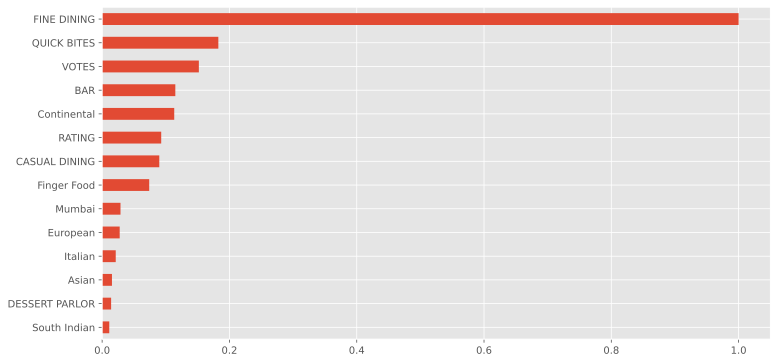

In [37]:
feature_importance_df=(pd.Series(data=gb_on_unscaled.feature_importances_,
                                   index=food_cost_processed.drop(columns=['COST']).columns.values)/gb_on_unscaled.feature_importances_.max()).sort_values()
plt.figure(figsize=(12,6))
selected_feature_importance=feature_importance_df.copy()[feature_importance_df.values>=0.01]
selected_feature_importance.plot.barh();

In [41]:
final_X, final_Y=food_cost_processed.copy()[selected_feature_importance.index.values],food_cost_processed.copy()['COST']
X_train,X_test,Y_train,Y_test=train_test_split(final_X,final_Y,test_size=0.3,shuffle=True)

In [42]:
rf_on_unscaled=RandomForestRegressor(random_state=best_rs)
cv_mae=cross_val_score(estimator=rf_on_unscaled,
                       X=X_train,
                       y=Y_train,
                       scoring='neg_mean_absolute_error',
                       cv=10,
                       n_jobs=-1).mean()*-1

rf_on_unscaled.fit(X_train,Y_train)
test_mae=mean_absolute_error(y_true=Y_test,
                             y_pred=rf_on_unscaled.predict(X_test))
print(f'Cross val score {cv_mae}')
print(f'Test state {test_mae}')

Cross val score 232.73124912170888
Test state 239.63275082881592


In [40]:
gb_on_unscaled=GradientBoostingRegressor(random_state=best_rs)
cv_mae=cross_val_score(estimator=gb_on_unscaled,
                       X=X_train,
                       y=Y_train,
                       scoring='neg_mean_absolute_error',
                       cv=10,
                       n_jobs=-1).mean()*-1

gb_on_unscaled.fit(X_train,Y_train)
test_mae=mean_absolute_error(y_true=Y_test,
                             y_pred=gb_on_unscaled.predict(X_test))
print(f'Cross val score {cv_mae}')
print(f'Test state {test_mae}')

Cross val score 215.50464094614728
Test state 217.15066258386364


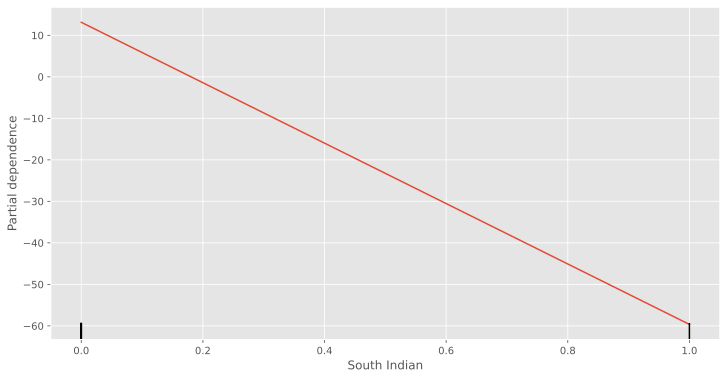

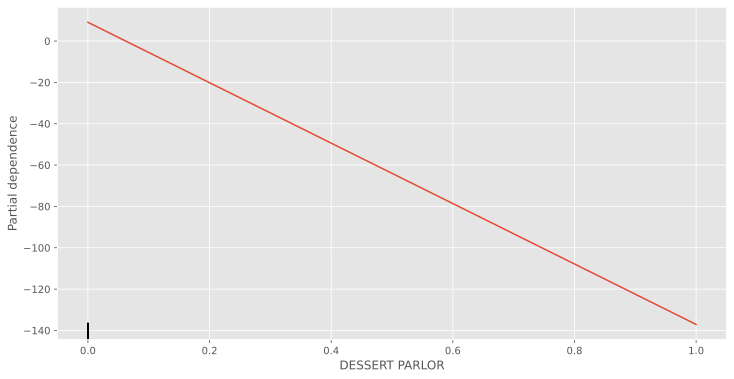

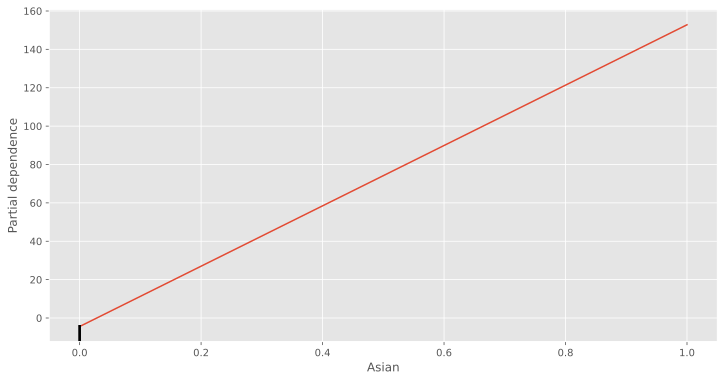

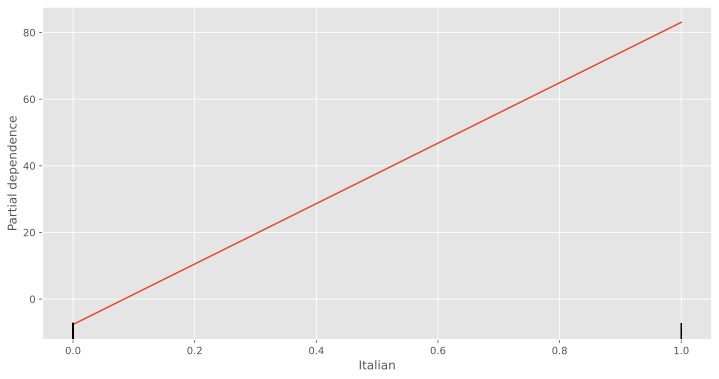

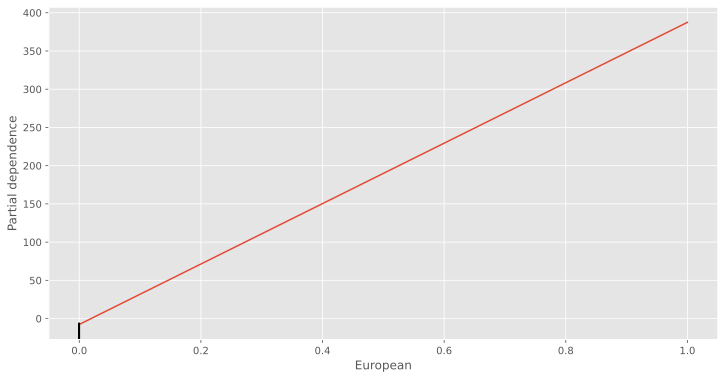

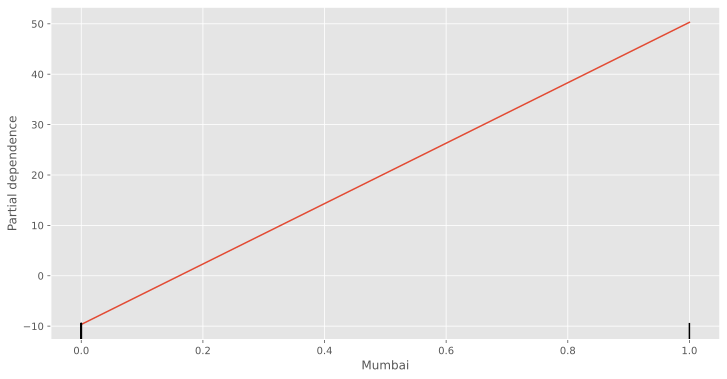

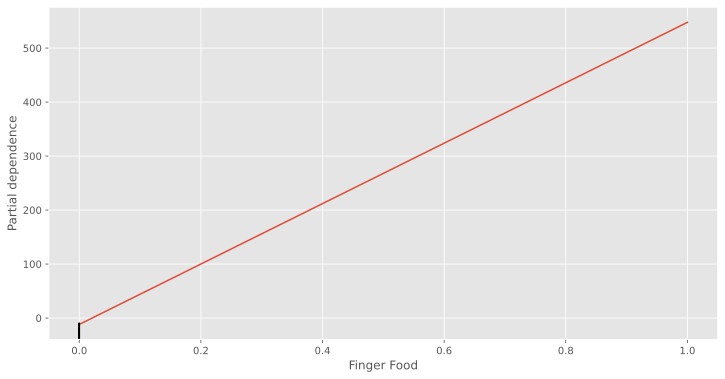

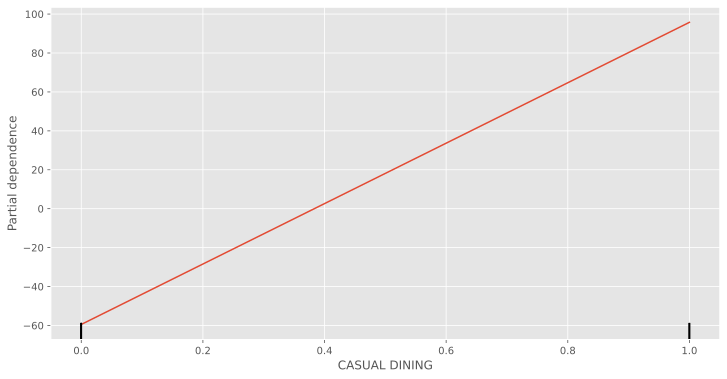

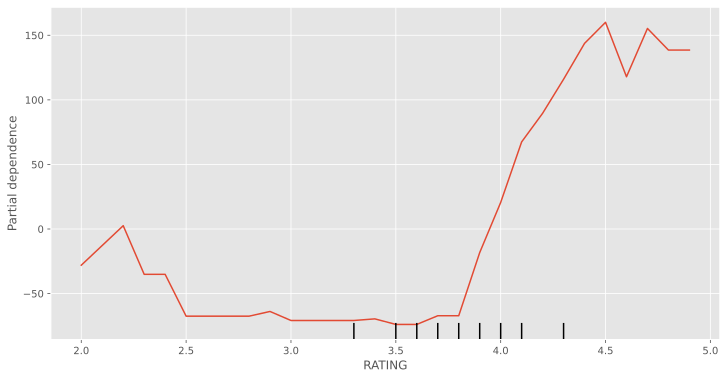

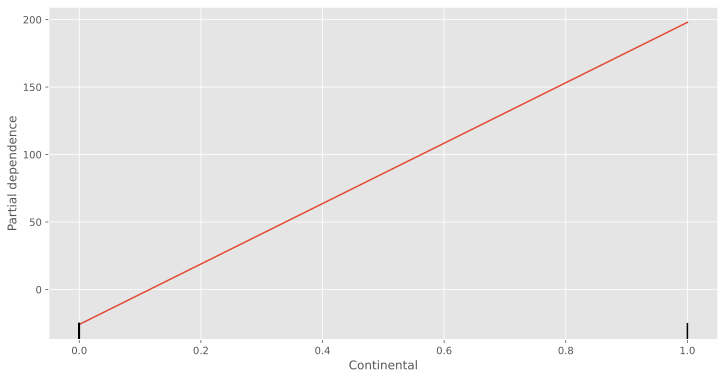

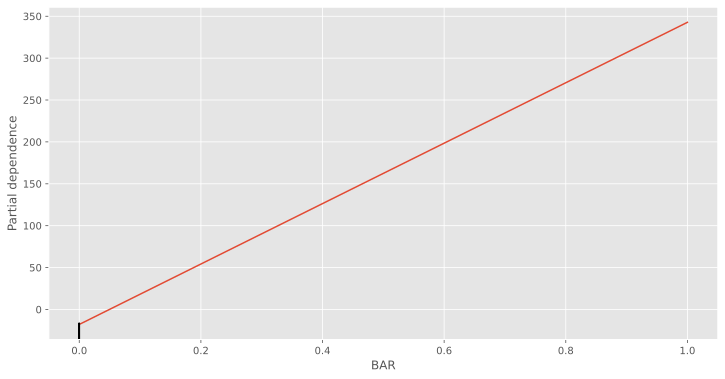

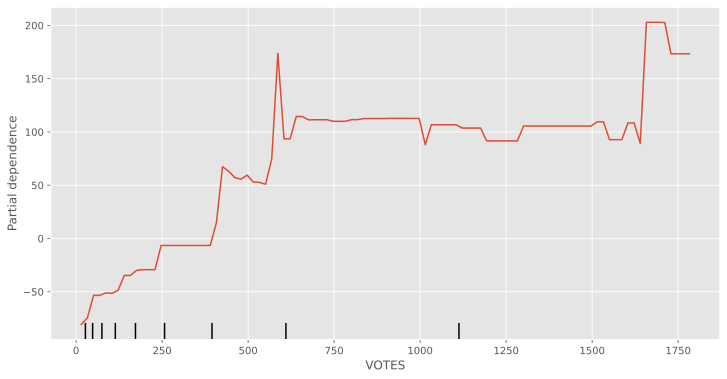

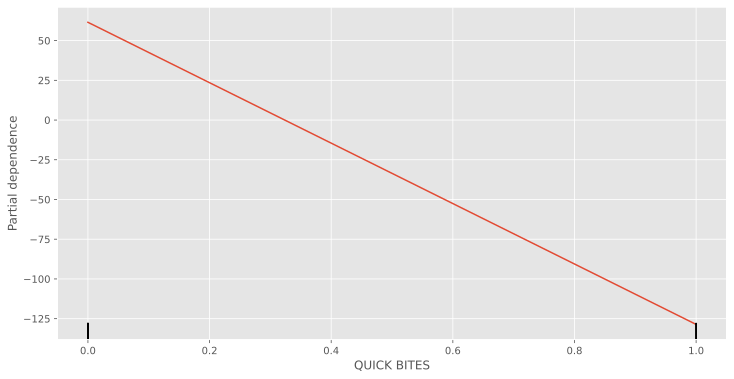

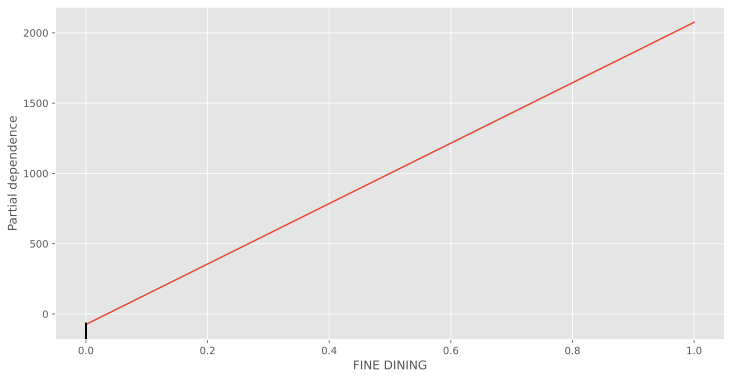

In [43]:
partial_dependent_df=pd.DataFrame(data=X_test,
                                  columns=final_X.columns.values).reset_index(drop=True)
for col in partial_dependent_df.columns.values:
    fig,ax=plt.subplots(1,figsize=(12,6))
    PartialDependenceDisplay.from_estimator(estimator=gb_on_unscaled,
                                            X=partial_dependent_df,
                                            features=[col],
                                            ax=ax)